In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/home/antonius/Projects/DS_Projects/Check-ups/3_Machine_learning/data/uk-used-cars/bmw.csv')

In [4]:
df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


# Train, test, validation

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(df,train_size=0.6,random_state=42)

In [7]:
val, test = train_test_split(test,train_size=0.5,random_state=42)

## Features lists

In [8]:
from catboost import CatBoostRegressor

In [9]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']

cat_features = ['model', 'transmission', 'fuelType']

y = ['price']

In [10]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.08,
              'random_seed':42,
              'verbose':100}

In [11]:
model = CatBoostRegressor(**parameters)

In [12]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.4564416	test: 0.4521294	best: 0.4521294 (0)	total: 55ms	remaining: 54.9s
100:	learn: 0.0875290	test: 0.0867329	best: 0.0867329 (100)	total: 332ms	remaining: 2.95s
200:	learn: 0.0760834	test: 0.0779235	best: 0.0779235 (200)	total: 594ms	remaining: 2.36s
300:	learn: 0.0708670	test: 0.0740290	best: 0.0740290 (300)	total: 857ms	remaining: 1.99s
400:	learn: 0.0676240	test: 0.0718814	best: 0.0718814 (400)	total: 1.12s	remaining: 1.68s
500:	learn: 0.0654070	test: 0.0709221	best: 0.0708594 (496)	total: 1.39s	remaining: 1.38s
600:	learn: 0.0638577	test: 0.0704606	best: 0.0704490 (599)	total: 1.65s	remaining: 1.1s
700:	learn: 0.0622969	test: 0.0698226	best: 0.0698226 (700)	total: 1.92s	remaining: 819ms
800:	learn: 0.0609583	test: 0.0694169	best: 0.0694004 (791)	total: 2.19s	remaining: 544ms
900:	learn: 0.0596089	test: 0.0689968	best: 0.0689945 (895)	total: 2.45s	remaining: 269ms
999:	learn: 0.0584626	test: 0.0686829	best: 0.0686377 (993)	total: 2.72s	remaining: 0us

bestTest = 0.0686

# Check on the test sample

In [13]:
test['price_pred'] = model.predict(test[X])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [15]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [16]:
error(test['price'],test['price_pred'])

1537.5600657036578
0.0724718966452533


# Error analysis

In [17]:
test['error'] = test['price_pred'] - test['price']

In [18]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658


In [19]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

<AxesSubplot: >

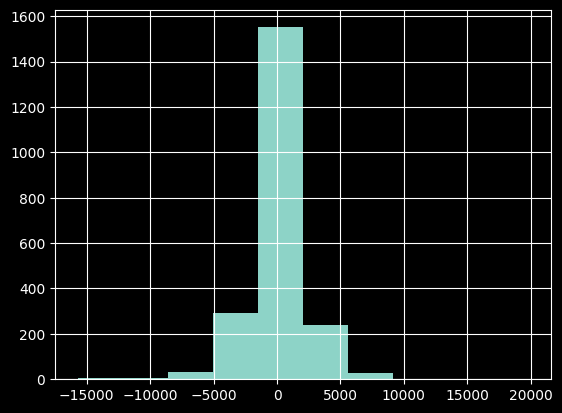

In [20]:
test['error'].hist()

In [21]:
test['error'].mean()

122.08788795070966

# Observational error

In [22]:
test['error_abs'] = abs(test['error'])

In [23]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658


In [24]:
test['error_abs'].describe()

count     2157.000000
mean      1537.560066
std       1676.859544
min          0.083199
25%        489.152540
50%       1073.305750
75%       1946.619471
max      19820.676673
Name: error_abs, dtype: float64

In [25]:
test.sort_values('error_abs',ascending=False).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673
1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31822.814760,-15727.185240,15727.185240
6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28016.370190,-14503.629810,14503.629810
6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,85092.283023,14097.283023,14097.283023
2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32052.149452,-12927.850548,12927.850548
6270,M4,2020,59999,Semi-Auto,3000,Petrol,150,28.5,3.0,47193.043921,-12805.956079,12805.956079
947,2 Series,2015,11998,Semi-Auto,30738,Diesel,20,68.9,2.0,24663.932331,12665.932331,12665.932331
6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,30133.732400,-12361.267600,12361.267600
4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,46802.901943,-11859.098057,11859.098057
6215,M4,2018,53999,Semi-Auto,8725,Petrol,145,33.6,3.0,42513.071957,-11485.928043,11485.928043


## Analysis of the Observational error relative to the price

In [26]:
pd.qcut(test['price'],5)

4984     (29990.0, 74990.0]
4880     (23131.6, 29990.0]
9132    (1199.999, 13995.0]
6451    (1199.999, 13995.0]
7199     (23131.6, 29990.0]
               ...         
9627     (13995.0, 18500.0]
6096     (23131.6, 29990.0]
1747     (29990.0, 74990.0]
4023     (13995.0, 18500.0]
4372     (23131.6, 29990.0]
Name: price, Length: 2157, dtype: category
Categories (5, interval[float64, right]): [(1199.999, 13995.0] < (13995.0, 18500.0] < (18500.0, 23131.6] < (23131.6, 29990.0] < (29990.0, 74990.0]]

In [27]:
test['price_group'] = pd.qcut(test['price'],5)

In [28]:
test.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]"


In [29]:
test.groupby('price_group')[['error_abs','error']].agg(['count','mean'])

error_abs              error            
                        count         mean count        mean
price_group                                                 
(1199.999, 13995.0]       435   911.712080   435  462.229738
(13995.0, 18500.0]        432  1151.556512   432  281.411969
(18500.0, 23131.6]        427  1318.846517   427  254.475675
(23131.6, 29990.0]        432  1749.723698   432  378.241254
(29990.0, 74990.0]        431  2560.143373   431 -768.811293

In [30]:
t = test.groupby('price_group')[['error_abs','error']].agg(['count','mean'])

In [31]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [32]:
t = t.drop('error_count',axis=1)

In [33]:
t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()

In [34]:
t['mean_error'] = test['error_abs'].mean()

In [35]:
import seaborn as sns
cm = sns.dark_palette("red", as_cmap=True)

In [36]:
t.style.background_gradient(cmap=cm,subset=['mean_error_diff'])

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(1199.999, 13995.0]",435,911.712080,462.229738,-625.847985,1537.560066
"(13995.0, 18500.0]",432,1151.556512,281.411969,-386.003554,1537.560066
"(18500.0, 23131.6]",427,1318.846517,254.475675,-218.713549,1537.560066
"(23131.6, 29990.0]",432,1749.723698,378.241254,212.163632,1537.560066
"(29990.0, 74990.0]",431,2560.143373,-768.811293,1022.583307,1537.560066


## Analysis of the Observational error relative to other variables

In [37]:
test.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]"


In [38]:
t = test.groupby('year')[['error_abs','error']].agg(['count','mean']) 

In [40]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [41]:
t = t.drop('error_count',axis=1)

In [42]:
t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()

In [43]:
t['mean_error'] = test['error_abs'].mean()

In [44]:
t.style.background_gradient(cmap=cm,subset=['mean_error_diff'])

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6339.136209,6339.136209,4801.576144,1537.560066
1999,1,890.056901,890.056901,-647.503164,1537.560066
2001,1,927.316449,927.316449,-610.243617,1537.560066
2002,2,2175.440983,-1069.308819,637.880917,1537.560066
2003,1,1482.424637,-1482.424637,-55.135428,1537.560066
2004,4,1902.279284,-305.313519,364.719218,1537.560066
2006,3,1660.249510,775.274447,122.689445,1537.560066
2007,2,1003.062275,1003.062275,-534.497791,1537.560066
2008,4,3182.698112,3182.698112,1645.138047,1537.560066


In [46]:
def print_error(col):
  t = test.groupby(col)[['error_abs','error']].agg(['count','mean'])
  t.columns = ['_'.join(col).strip() for col in t.columns.values]
  t = t.drop('error_count',axis=1)
  t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()
  t['mean_error'] = test['error_abs'].mean()
  display(t.style.background_gradient(cmap=cm,subset=['mean_error_diff']))

In [47]:
print_error('year')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6339.136209,6339.136209,4801.576144,1537.560066
1999,1,890.056901,890.056901,-647.503164,1537.560066
2001,1,927.316449,927.316449,-610.243617,1537.560066
2002,2,2175.440983,-1069.308819,637.880917,1537.560066
2003,1,1482.424637,-1482.424637,-55.135428,1537.560066
2004,4,1902.279284,-305.313519,364.719218,1537.560066
2006,3,1660.249510,775.274447,122.689445,1537.560066
2007,2,1003.062275,1003.062275,-534.497791,1537.560066
2008,4,3182.698112,3182.698112,1645.138047,1537.560066


In [48]:
test 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,-805.382911,805.382911,"(13995.0, 18500.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,1143.807549,1143.807549,"(23131.6, 29990.0]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,-787.571904,787.571904,"(29990.0, 74990.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,-1199.358335,1199.358335,"(13995.0, 18500.0]"


In [49]:
print_error('transmission')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
transmission,,,,,
Automatic,695,1494.208611,36.406949,-43.351455,1537.560066
Manual,504,1079.145745,142.507574,-458.414320,1537.560066
Semi-Auto,958,1810.180189,173.504100,272.620124,1537.560066


In [50]:
test['mileage_group'] = pd.qcut(test['mileage'],5)

In [51]:
print_error('mileage_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mileage_group,,,,,
"(0.999, 4063.2]",432,2433.845556,293.238143,896.285490,1537.560066
"(4063.2, 9825.4]",431,1725.080432,67.411269,187.520367,1537.560066
"(9825.4, 24299.0]",432,1395.285364,65.804632,-142.274702,1537.560066
"(24299.0, 43519.8]",430,1141.553935,13.742028,-396.006130,1537.560066
"(43519.8, 190000.0]",432,990.635754,169.615201,-546.924311,1537.560066


In [52]:
print_error('fuelType')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
fuelType,,,,,
Diesel,1394,1437.061117,98.276014,-100.498949,1537.560066
Hybrid,64,1558.853198,-352.158801,21.293132,1537.560066
Other,5,944.136410,-941.902308,-593.423655,1537.560066
Petrol,694,1741.738585,221.317702,204.178520,1537.560066


In [53]:
test['tax_group'] = pd.qcut(test['tax'],5,duplicates='drop')

In [54]:
print_error('tax_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
tax_group,,,,,
"(-0.001, 125.0]",512,823.722414,91.176598,-713.837651,1537.560066
"(125.0, 145.0]",1131,1807.424736,117.301327,269.864670,1537.560066
"(145.0, 150.0]",252,1707.575874,118.514950,170.015808,1537.560066
"(150.0, 580.0]",262,1604.063700,206.593848,66.503634,1537.560066


In [55]:
test['mpg_group'] = pd.qcut(test['mpg'],5)

In [56]:
print_error('mpg_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mpg_group,,,,,
"(5.499, 42.2]",444,2159.412978,227.429403,621.852912,1537.560066
"(42.2, 50.4]",487,1664.200649,361.406267,126.640583,1537.560066
"(50.4, 55.4]",380,1517.852124,46.756860,-19.707942,1537.560066
"(55.4, 64.2]",449,1238.191642,-105.163252,-299.368424,1537.560066
"(64.2, 470.8]",397,1044.181685,39.825594,-493.378380,1537.560066


In [57]:
test.groupby('mpg_group')[['price','year']].agg(['count','mean'])

price                year             
              count          mean count         mean
mpg_group                                           
(5.499, 42.2]   444  32876.211712   444  2017.743243
(42.2, 50.4]    487  23569.260780   487  2017.451745
(50.4, 55.4]    380  21489.018421   380  2017.194737
(55.4, 64.2]    449  18276.222717   449  2016.443207
(64.2, 470.8]   397  16704.297229   397  2016.727960

In [58]:
test.groupby('year')['mpg'].agg(['count','mean'])

,count,mean
year,,
1996,1,26.400000
1999,1,31.000000
2001,1,27.700000
2002,2,28.950000
2003,1,26.400000
2004,4,27.125000
2006,3,37.566667
2007,2,36.850000
2008,4,41.075000


<AxesSubplot: xlabel='year'>

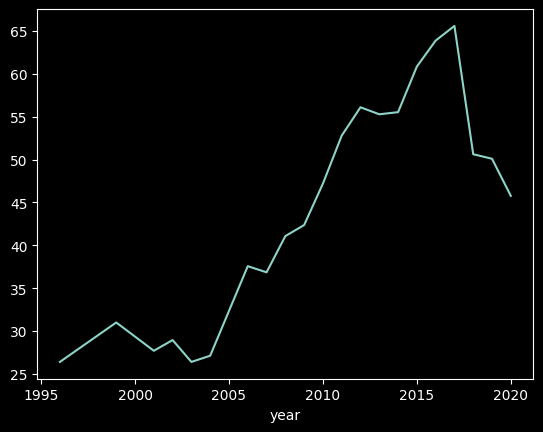

In [59]:
test.groupby('year')['mpg'].mean().plot()

In [60]:
test['engineSize'].value_counts()

2.0    1323
3.0     495
1.5     278
1.6      24
4.4      15
0.0       7
2.5       4
2.2       3
2.8       2
3.2       2
4.0       2
0.6       1
6.6       1
Name: engineSize, dtype: int64

In [61]:
test['engine_group'] = pd.cut(test['engineSize'],[0,1.5,2,float('inf')])

In [62]:
print_error('engine_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
engine_group,,,,,
"(0.0, 1.5]",279,1135.531674,149.248281,-402.028392,1537.560066
"(1.5, 2.0]",1347,1423.236324,60.610112,-114.323742,1537.560066
"(2.0, inf]",524,2049.868683,265.297889,512.308617,1537.560066


<AxesSubplot: xlabel='year'>

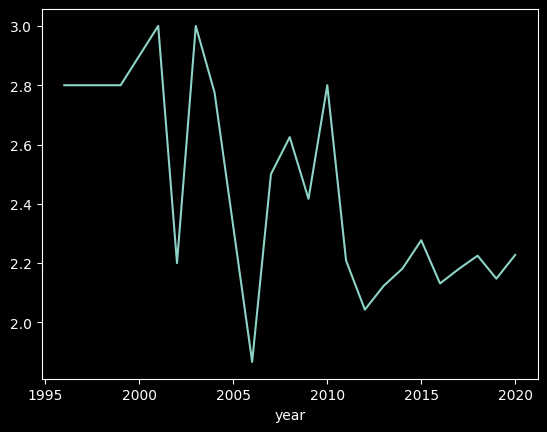

In [63]:
test.groupby('year')['engineSize'].mean().plot()

# Feature importances

In [64]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,year,21.663393
1,engineSize,19.886510
2,mileage,17.956035
3,model,16.587238
4,mpg,14.284600
5,fuelType,4.843232
6,transmission,3.381356
7,tax,1.397635


# Shap

In [65]:
import shap
shap.initjs()

In [66]:
X

['model',
 'year',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

In [67]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

In [68]:
pd.DataFrame(shap_values,columns=X)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,8311.485019,3980.876570,1463.005737,4864.958351,3232.159966,196.716562,7303.931770,4667.784345
1,-562.037416,301.743835,951.979426,519.712494,-24.075024,64.161187,-1051.225627,-731.720828
2,-2557.859291,-1952.004143,228.397317,-4370.190404,-741.041540,-209.530425,1371.355711,-1007.771594
3,-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
4,137.767669,6915.041139,897.684328,6120.097476,-1272.080140,54.600912,1584.427320,-1656.612208
...,...,...,...,...,...,...,...,...
2152,-1224.126471,-3428.321075,115.041872,-5570.789418,347.522997,-7.006045,-930.727806,2123.672872
2153,-937.230018,4128.877652,449.394203,1939.237643,-1539.789666,170.712067,885.092764,2955.162742
2154,1331.256544,3296.088696,254.481261,3740.499059,454.362542,263.610745,-1327.864100,-998.356812
2155,-1168.529298,-2089.345887,191.549832,-4610.373744,1502.199214,-370.595925,-1726.061783,-697.550907


In [69]:
train['price'].mean()

22768.483920841063

In [70]:
shap.force_plot(explainer.expected_value, shap_values[0,:], test[X].iloc[0,:])

<AxesSubplot: >

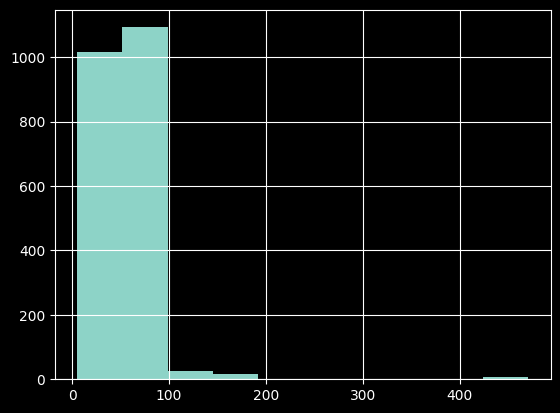

In [71]:
test['mpg'].hist()

In [72]:
(test['mpg'] < 34.9).mean()

0.06212331942512749

# Top 10 Errors

In [73]:
shap_cols = [x+'_shap' for x in X]

In [74]:
shap_cols

['model_shap',
 'year_shap',
 'transmission_shap',
 'mileage_shap',
 'fuelType_shap',
 'tax_shap',
 'mpg_shap',
 'engineSize_shap']

In [75]:
shap_values_df = pd.DataFrame(shap_values,columns=shap_cols)

In [76]:
shap_values_df

,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
0,8311.485019,3980.876570,1463.005737,4864.958351,3232.159966,196.716562,7303.931770,4667.784345
1,-562.037416,301.743835,951.979426,519.712494,-24.075024,64.161187,-1051.225627,-731.720828
2,-2557.859291,-1952.004143,228.397317,-4370.190404,-741.041540,-209.530425,1371.355711,-1007.771594
3,-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
4,137.767669,6915.041139,897.684328,6120.097476,-1272.080140,54.600912,1584.427320,-1656.612208
...,...,...,...,...,...,...,...,...
2152,-1224.126471,-3428.321075,115.041872,-5570.789418,347.522997,-7.006045,-930.727806,2123.672872
2153,-937.230018,4128.877652,449.394203,1939.237643,-1539.789666,170.712067,885.092764,2955.162742
2154,1331.256544,3296.088696,254.481261,3740.499059,454.362542,263.610745,-1327.864100,-998.356812
2155,-1168.529298,-2089.345887,191.549832,-4610.373744,1502.199214,-370.595925,-1726.061783,-697.550907


In [80]:
test.head(2)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group,tax_group,mpg_group,engine_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]","(9825.4, 24299.0]","(145.0, 150.0]","(55.4, 64.2]","(1.5, 2.0]"


In [81]:
test_shap = pd.concat([test.reset_index(),shap_values_df],axis=1)

In [82]:
len(test)

2157

In [83]:
test_shap = test_shap.sort_values('error_abs',ascending=False)

In [84]:
shap.force_plot(explainer.expected_value, test_shap[shap_cols].values[0,:], test_shap[X].iloc[0,:])

In [85]:
test_shap

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,...,mpg_group,engine_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,...,"(5.499, 42.2]","(1.5, 2.0]",-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
144,1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,...,"(55.4, 64.2]","(1.5, 2.0]",-104.479186,5182.943839,677.382931,4770.282152,386.823223,181.037349,-1100.984160,-938.541551
1914,6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,...,"(64.2, 470.8]","(1.5, 2.0]",-164.479811,4387.541547,614.274945,4198.937818,-57.662328,181.648133,-2841.705569,-1070.534707
1349,6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,...,"(5.499, 42.2]","(2.0, inf]",13054.103088,4340.189600,2185.334863,9822.539987,661.055741,145.413544,22742.361574,9372.934464
706,2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,...,"(55.4, 64.2]","(1.5, 2.0]",3716.360225,2802.188759,927.076271,5460.684012,164.840088,-147.249380,-1339.477898,-2300.622786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,9630,X1,2017,14226,Manual,41950,Diesel,20,68.9,2.0,...,"(64.2, 470.8]","(1.5, 2.0]",-368.809564,-201.713537,-2392.563547,-2667.325316,-115.354445,-280.850026,-1978.662794,-538.349577
724,8122,4 Series,2017,20000,Automatic,14282,Petrol,145,48.7,2.0,...,"(42.2, 50.4]","(1.5, 2.0]",100.498923,-1038.006507,201.178311,52.262838,-892.858465,279.318838,-771.782615,-700.140113
1797,4860,1 Series,2017,13500,Manual,34500,Diesel,150,65.7,2.0,...,"(64.2, 470.8]","(1.5, 2.0]",-2842.993660,-197.772588,-2316.449417,-2058.535444,141.577611,169.216690,-1655.255186,-508.938235
431,8183,3 Series,2012,10240,Automatic,37089,Petrol,160,47.1,2.0,...,"(42.2, 50.4]","(1.5, 2.0]",-1081.843133,-7435.547213,91.974973,-2118.066937,-742.526118,-204.358477,-152.774073,-884.771396


In [86]:
print_error('model')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
model,,,,,
1 Series,381,1194.311617,55.623839,-343.248449,1537.560066
2 Series,237,1389.965171,192.186465,-147.594895,1537.560066
3 Series,499,1355.692418,63.756704,-181.867648,1537.560066
4 Series,203,1686.099936,-49.587893,148.539871,1537.560066
5 Series,216,1587.859992,188.397477,50.299926,1537.560066
6 Series,17,1864.737066,740.014597,327.177000,1537.560066
7 Series,19,3034.690317,-1632.958667,1497.130251,1537.560066
8 Series,4,3053.702352,-2506.798194,1516.142287,1537.560066
M2,10,2853.991753,2730.294541,1316.431687,1537.560066


<AxesSubplot: >

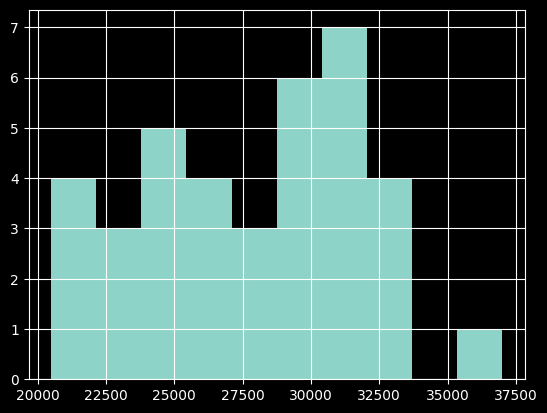

In [87]:
train[(train['model'] == ' 1 Series')&(train['year'] == 2020)]['price'].hist()

<AxesSubplot: >

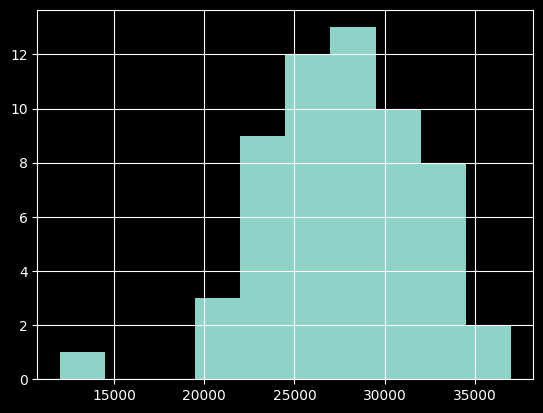

In [88]:
df[(df['model'] == ' 1 Series')&(df['year'] == 2020)]['price'].hist()

In [89]:
shap.force_plot(explainer.expected_value, 
                test_shap[shap_cols].head(10).values,
                test_shap[X].head(10))

In [92]:
shap.force_plot(explainer.expected_value, 
                test_shap[shap_cols].values,
                test_shap[X])